In [52]:
import pandas as pd # For loading csv file data to numpy array
import numpy as np # For using data as array
import matplotlib.pyplot as plt # For plotting graph(x,y)
import matplotlib as mpl
from sklearn.linear_model import LinearRegression # To perform MLR
from sklearn.model_selection import train_test_split # For splitting data into train and test sets
from datetime import datetime # To show current data and time
print('------------------------------Multiple Linear Regression------------------------------')
print('Name: Teli Farhana Khatoon')
print('Roll No.21')
print('College name: Vivek College of Commerce')
print('M.sc(I.T.)[Sem 2]')
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("Date and Time =", dt_string)	
#To import dataset
data=pd.read_csv('cars.csv')
data.head() #To show data

------------------------------Multiple Linear Regression------------------------------
Name: Teli Farhana Khatoon
Roll No.21
College name: Vivek College of Commerce
M.sc(I.T.)[Sem 2]
Date and Time = 12/04/2022 16:06:49


,Volume,Weight,CO2,Car,Model
0,1000.0,790.0,99.0,Toyota,Aygo
1,1200.0,1160.0,95.0,Mitsubishi,Space Star
2,1000.0,929.0,95.0,Skoda,Citigo
3,900.0,865.0,90.0,Fiat,500
4,1500.0,1140.0,105.0,Mini,Cooper


In [53]:
# Define predictor and target variable
x=data[['Weight','Volume']] # Independent variable or predictor.
y=data['CO2'] # Dependent variable or outcome.
# Splitting the data into training and testing subsets
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=0)
print('------Shape of the training and testing datasets------')
print('shape', x_train.shape, y_train.shape)
print('shape', x_test.shape, y_test.shape)
# Fit the data model
mlr=LinearRegression() # Use the LinearRegression() method to create a linear regression object
model=mlr.fit(x, y)
# To calculate intercept and coefficient value
print('Intercept:', mlr.intercept_) 
print('Coefficient:', mlr.coef_)
# Multiple Linear Regression equation is as follows: y=b0+b1x1+b2x2 
# (Wherein b0 is intercept, b1 is the coefficient of x1, and b2 is the coefficient of x2)
B0=mlr.intercept_
B1=mlr.coef_[0]
B2=mlr.coef_[1]
print('b0:', B0)
print('b1:', B1)
print('b2:', B2)
reg_line = 'CO2 = {} + {}*Weight + {}*Volume'.format(B0, round(B1, 4), round(B2, 4)) # To show Regression Line using y=B0+B1X format
print(reg_line)
# Predict CO2 values based on a car's weight and volume
#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2_1 = mlr.predict([[2300, 1300]])
print('Predict value:', predictedCO2_1)
# We have already predicted that if a car with a 1300cm3 engine weighs 2300kg, the CO2 emission will be approximately 107g.
# What if we increase the weight with 1000kg?
predictedCO2_2 = mlr.predict([[3300, 1300]])
print('After increase the weight predict value:', predictedCO2_2)
# To find R squared value
Rsqr=mlr.score(x_test, y_test)
print('R squared value is:', Rsqr)

------Shape of the training and testing datasets------
shape (25, 2) (25,)
shape (11, 2) (11,)
Intercept: 79.69471929115939
Coefficient: [0.00755095 0.00780526]
b0: 79.69471929115939
b1: 0.0075509472703006895
b2: 0.007805257527747124
CO2 = 79.69471929115939 + 0.0076*Weight + 0.0078*Volume
Predict value: [107.2087328]
After increase the weight predict value: [114.75968007]
R squared value is: 0.4944202790330685


C:\Users\Saddamk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Saddamk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


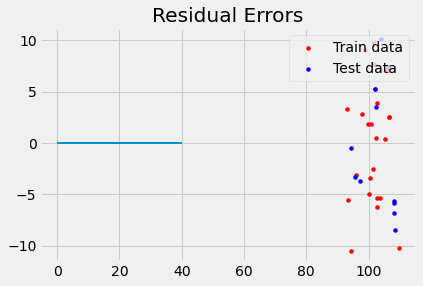

In [54]:
# Plot for residual error
# Setting plot style
plt.style.use('fivethirtyeight')
# Plotting residual errors in training data
plt.scatter(mlr.predict(x_train), mlr.predict(x_train)-y_train, color='r', s=15, label= 'Train data')
# Plotting residual errors in testing data
plt.scatter(mlr.predict(x_test), mlr.predict(x_test)-y_test, color='b', s=15, label= 'Test data')
# Plotting line for Zero residual error
plt.hlines(y=0, xmin=0, xmax=40, linewidth=2)
# Plotting legend 
plt.legend(loc='upper right')
# Plot title
plt.title("Residual Errors")
# Method call for showing the plot
plt.show()


https://medium.com/swlh/simple-and-multiple-linear-regression-in-python-70dd09f9acbf

https://www.w3schools.com/python/python_ml_multiple_regression.asp

https://youtu.be/m-k84cCves8